# PROJECT 3 - NLP Classifier:

**Problem Statement** 

We have been challenged to build a classification model which can identify if text came from either a TRUMP or IMPEACH_TRUMP subreddit post.  Our model was trained on over 800 posts and tested on nearly 200.  

We used two classification models: 
- Logistic Regression Classification Model & 
- Multinomial Naive Bayes Classification Model.
- We also include an Appendix section where we tested a Random Forest model & other classifiers. 

**Exploratory Data Analysis** 

SCRAP: Before modeling we had to perform multiple webscraps from the reddit website to collect the data and save to two .csv file for our analysis.  Using Pandas we imported the two .csv files into two dataframes where we performed some EDA on the data.

REVIEW: It appeared that the title column contained most of the text we needed for our classification analysis.  A wordcloud visualization highlighted some key differences in words from each .csv file.  Reviewing the dtype under our 'title' column shows that its text data 'type('o')'. The task we want to solve for is, given the text under 'title' can we assign the source lable "Trump" or "impeach_Trump" based on the text content. 

TEXT TO NUMBERS: We need to convert our string of text into a numeric representation that we can apply our machine learning algorithms to. To do this we combine our two dataframes into one dataframe, then train/test split. We next look to tokenize and ecode key words in the 'title' column into a digital vocabulary library.  To do this we use the CountVectorizer, which is our transformer from text to numbers. We fit the CV to the 'title' column in our X_train, then transform to X_train and X_test.

MACHINE LEARNING: First, we fit our logistic regression algorithm to X_train and y_train, then y_predict to our x-test data. Then we performed a similar analysis using a Multinomial Naive Bayes Classification Model.  Further, we modified our CV to a TFIDF tokenizer to test for improved performance. 

**Conclusion** 

We were able to generate reasonably high accuracy scores using both classification models: 
1) Logistic Regression Classification Model 0.9145 using CV and 0.94 using TFIDF
2) Multinomial Naive Bayes Classification Model 0.92 using CV and 0.88 using TFIDF

Additionally, we ran the Confusion Matrix for both with the following scores:
- Logist Regression & TFIDF:   Predicted Trump   Predicted Impeach_trump
        Actual Trump                 165                24
        Actual Impeach                 6               170
        
- MN Bayes & CV:               Predicted Trump   Predicted Impeach_trump
        Actual Trump                 162                13
        Actual Impeach                15               161


**Recommendation** 

The best performing classification model which can predict text written on either 'Trump' or 'Impeach_Trump' is the Logistic Regression using a TFIDF tokenizer.  Additionally, its accuracyof 0.94 appears quite high, to use with a high level of confidence in its predictive value.  



# 1) Import Dataset

In [1]:
# Imports at the top
import json
import urllib
import pandas as pd
import numpy as np
import requests

import re
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns; sns.set()


import time
import random


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles




In [2]:
# Toggle between impeach_trump & trump

url = 'https://www.reddit.com/r/Impeach_Trump.json'
# url = 'https://www.reddit.com/r/trump.json'

In [3]:
res = requests.get(url)

In [4]:
res.status_code

429

Reddit knows that you are using a Chrome browser on a Mac is trying to access the address https://www.reddit.com/r/boardgames.json However, Python has its own default user agent. Since there are so many scripts out there that are already 'hitting' reddit's API, reddit is basically shutting down all Python scripts from accessing its API.

We will change our request a little bit to make it not use the default user agent. 

In [5]:
res = requests.get(url, headers={'User-agent': 'Pony Inc 1.0'})

In [6]:
res.status_code

200

In [7]:
reddit_dict = res.json()

In [8]:
reddit_dict.keys()

dict_keys(['kind', 'data'])

In [9]:
reddit_dict['kind']

'Listing'

In [10]:
reddit_dict['data']

{'modhash': '',
 'dist': 25,
 'children': [{'kind': 't3',
   'data': {'approved_at_utc': None,
    'subreddit': 'Impeach_Trump',
    'selftext': '',
    'author_fullname': 't2_h9ibg',
    'saved': False,
    'mod_reason_title': None,
    'gilded': 0,
    'clicked': False,
    'title': 'Former Arizona sheriff Joe Arpaio described his own detention facility as a "concentration camp." He was later convicted of ignoring a judge\'s order that he could not just go around detaining and holding migrants in his "concentration camp." Trump decided Arpaio deserved a pardon for this.',
    'link_flair_richtext': [],
    'subreddit_name_prefixed': 'r/Impeach_Trump',
    'hidden': False,
    'pwls': 1,
    'link_flair_css_class': None,
    'downs': 0,
    'thumbnail_height': 73,
    'hide_score': False,
    'name': 't3_c2v9to',
    'quarantine': False,
    'link_flair_text_color': 'dark',
    'author_flair_background_color': None,
    'subreddit_type': 'public',
    'ups': 1217,
    'total_awards_re

In [11]:
reddit_dict['data'].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

The most important keys are `children` and `after`.

In [12]:
reddit_dict['data']['children']

[{'kind': 't3',
  'data': {'approved_at_utc': None,
   'subreddit': 'Impeach_Trump',
   'selftext': '',
   'author_fullname': 't2_h9ibg',
   'saved': False,
   'mod_reason_title': None,
   'gilded': 0,
   'clicked': False,
   'title': 'Former Arizona sheriff Joe Arpaio described his own detention facility as a "concentration camp." He was later convicted of ignoring a judge\'s order that he could not just go around detaining and holding migrants in his "concentration camp." Trump decided Arpaio deserved a pardon for this.',
   'link_flair_richtext': [],
   'subreddit_name_prefixed': 'r/Impeach_Trump',
   'hidden': False,
   'pwls': 1,
   'link_flair_css_class': None,
   'downs': 0,
   'thumbnail_height': 73,
   'hide_score': False,
   'name': 't3_c2v9to',
   'quarantine': False,
   'link_flair_text_color': 'dark',
   'author_flair_background_color': None,
   'subreddit_type': 'public',
   'ups': 1217,
   'total_awards_received': 1,
   'media_embed': {},
   'thumbnail_width': 140,
   'a

In [13]:
len(reddit_dict['data']['children'])

25

In [14]:
reddit_dict['data']['children'][0]

{'kind': 't3',
 'data': {'approved_at_utc': None,
  'subreddit': 'Impeach_Trump',
  'selftext': '',
  'author_fullname': 't2_h9ibg',
  'saved': False,
  'mod_reason_title': None,
  'gilded': 0,
  'clicked': False,
  'title': 'Former Arizona sheriff Joe Arpaio described his own detention facility as a "concentration camp." He was later convicted of ignoring a judge\'s order that he could not just go around detaining and holding migrants in his "concentration camp." Trump decided Arpaio deserved a pardon for this.',
  'link_flair_richtext': [],
  'subreddit_name_prefixed': 'r/Impeach_Trump',
  'hidden': False,
  'pwls': 1,
  'link_flair_css_class': None,
  'downs': 0,
  'thumbnail_height': 73,
  'hide_score': False,
  'name': 't3_c2v9to',
  'quarantine': False,
  'link_flair_text_color': 'dark',
  'author_flair_background_color': None,
  'subreddit_type': 'public',
  'ups': 1217,
  'total_awards_received': 1,
  'media_embed': {},
  'thumbnail_width': 140,
  'author_flair_template_id': No

In [15]:
reddit_dict['data']['children'][0].keys()

dict_keys(['kind', 'data'])

In [16]:
reddit_dict['data']['children'][0]['kind']

't3'

In [17]:
reddit_dict['data']['children'][0]['data']

{'approved_at_utc': None,
 'subreddit': 'Impeach_Trump',
 'selftext': '',
 'author_fullname': 't2_h9ibg',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'Former Arizona sheriff Joe Arpaio described his own detention facility as a "concentration camp." He was later convicted of ignoring a judge\'s order that he could not just go around detaining and holding migrants in his "concentration camp." Trump decided Arpaio deserved a pardon for this.',
 'link_flair_richtext': [],
 'subreddit_name_prefixed': 'r/Impeach_Trump',
 'hidden': False,
 'pwls': 1,
 'link_flair_css_class': None,
 'downs': 0,
 'thumbnail_height': 73,
 'hide_score': False,
 'name': 't3_c2v9to',
 'quarantine': False,
 'link_flair_text_color': 'dark',
 'author_flair_background_color': None,
 'subreddit_type': 'public',
 'ups': 1217,
 'total_awards_received': 1,
 'media_embed': {},
 'thumbnail_width': 140,
 'author_flair_template_id': None,
 'is_original_content': False,
 'user_reports'

In [18]:
reddit_dict['data']['children'][0]['data']['subreddit']

'Impeach_Trump'

In [19]:
reddit_dict['data']['children'][0]['data']['title']

'Former Arizona sheriff Joe Arpaio described his own detention facility as a "concentration camp." He was later convicted of ignoring a judge\'s order that he could not just go around detaining and holding migrants in his "concentration camp." Trump decided Arpaio deserved a pardon for this.'

In [20]:
reddit_dict['data']['children'][0]['data']['selftext']

''

We want to get all these posts into a Pandas DataFrame and thereafter we can save it to a CSV.

In [21]:
posts = [p['data'] for p in reddit_dict['data']['children']]

In [22]:
pd.DataFrame(posts)

,all_awardings,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,...,thumbnail_width,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,"[{'is_enabled': True, 'count': 1, 'subreddit_i...",None,None,False,imagepoem,NaN,None,None,[],None,...,140.0,Former Arizona sheriff Joe Arpaio described hi...,1,1217,https://www.azcentral.com/story/opinion/op-ed/...,[],None,False,house_only,1
1,[],None,None,False,therecordcorrected,NaN,None,None,[],None,...,140.0,"Frustrated Donald Trump ""chewed out"" staff for...",0,134,https://www.newsweek.com/maduro-trump-venezuel...,[],None,False,house_only,1
2,[],None,None,False,therecordcorrected,NaN,None,None,[],None,...,NaN,Lawyers: 250 children held in bad conditions a...,0,10,https://apnews.com/46da2dbe04f54adbb875cfbc06b...,[],None,False,house_only,1
3,[],None,None,False,therecordcorrected,NaN,None,None,[],None,...,140.0,Trump’s threat of mass arrests stinks of weakn...,0,76,https://www.washingtonpost.com/opinions/2019/0...,[],None,False,house_only,1
4,[],None,None,False,MrCleanDrawers,True,None,None,[],None,...,140.0,Yvette Clarke becomes the 65th House Democrat ...,0,1647,https://thehill.com/homenews/house/444874-whip...,[],None,False,house_only,1
5,[],None,None,False,therecordcorrected,NaN,None,None,[],None,...,140.0,These gruesome new Khashoggi revelations reinf...,0,140,https://www.washingtonpost.com/politics/2019/0...,[],None,False,house_only,1
6,[],None,None,False,wenchette,NaN,None,None,[],None,...,140.0,Trump pal Roger Stone violated gag order with ...,0,5,https://www.cnn.com/2019/06/20/politics/roger-...,[],None,False,house_only,1
7,[],None,None,False,therecordcorrected,NaN,None,None,[],None,...,140.0,"Trump is afraid he’ll lose reelection, and he’...",0,168,https://www.washingtonpost.com/opinions/2019/0...,[],None,False,house_only,1
8,[],None,None,False,wenchette,NaN,None,None,[],None,...,140.0,Trump's Major Lender Deutsche Bank Faces Crimi...,0,19,https://www.nytimes.com/2019/06/19/business/de...,[],None,False,house_only,1
9,[],None,None,False,therecordcorrected,NaN,None,None,[],None,...,NaN,Trump: I can win reelection with just my base ...,0,2,https://www.washingtonpost.com/opinions/2019/0...,[],None,False,house_only,1


In [23]:
pd.DataFrame(posts).to_csv('posts.csv')

In [24]:
reddit_dict['data']['after']

't3_c2kkm9'

This is the name of the last post.

In [25]:
pd.DataFrame(posts)['name']

0     t3_c2v9to
1     t3_c2v6yt
2     t3_c32y6k
3     t3_c2um03
4     t3_c2itcc
5     t3_c2roy7
6     t3_c31mcb
7     t3_c2pvwu
8     t3_c2vlrq
9     t3_c32o0j
10    t3_c31qb8
11    t3_c2p456
12    t3_c2q78q
13    t3_c2lp60
14    t3_c2ufio
15    t3_c2r7kk
16    t3_c2r0r2
17    t3_c2qj0n
18    t3_c2fpid
19    t3_c2rjt2
20    t3_c2ptvq
21    t3_c2nfew
22    t3_c2fm5k
23    t3_c2a6ls
24    t3_c2kkm9
Name: name, dtype: object

In [26]:
reddit_dict['data']['after']

't3_c2kkm9'

This is the new URL that gives you the next 25 posts.

In [27]:
url + '?after=' + reddit_dict['data']['after']

'https://www.reddit.com/r/Impeach_Trump.json?after=t3_c2kkm9'

## Looping through the posts, 25 posts at a time

In [28]:
posts = []
after = None

for a in range(4):
    if after == None:
        current_url = url
    else:
        current_url = url + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'Pony Inc 1.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts.extend(current_posts)
    after = current_dict['data']['after']
    
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,6)
    print(sleep_duration)
    time.sleep(sleep_duration)
    
# extending a list
# start off with after = None
# url ends with .json
# checking purposes we print(current_url)
# if status code is not 200 it will continue
# loop through each post and save to a list
# extend the post list one post at a time.
# this is to look human - to slow the time of your request
# line 24 is to delay

https://www.reddit.com/r/Impeach_Trump.json
6
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c2kkm9
5
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c26ncw
4
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c20td8
2


In [29]:
posts = []
after = None
i  = 0
for a in range(35):
    if after == None:
        current_url = url
    else:
        current_url = url + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'Pony Inc 1.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts.extend(current_posts)
    after = current_dict['data']['after']
    
    if a > 0:
        prev_posts = pd.read_csv('impeach_trump.csv')
#        prev_posts = pd.read_csv('trump.csv')

        current_df = pd.DataFrame()
        
    else:
        pd.DataFrame(posts).to_csv('impeach_trump.csv', index = False)
#        pd.DataFrame(posts).to_csv('trump.csv', index = False)

    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(1,2)
    i = i+1
    print(i)
    time.sleep(sleep_duration)

https://www.reddit.com/r/Impeach_Trump.json
1
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c2kkm9
2
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c26ncw
3
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c20td8
4
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c1k5qn
5
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c1e77n
6
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c0r4za
7
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c0cqvu
8
https://www.reddit.com/r/Impeach_Trump.json?after=t3_c05h81
9
https://www.reddit.com/r/Impeach_Trump.json?after=t3_bzs0yk
10
https://www.reddit.com/r/Impeach_Trump.json?after=t3_bzcckv
11
https://www.reddit.com/r/Impeach_Trump.json?after=t3_byyxzp
12
https://www.reddit.com/r/Impeach_Trump.json?after=t3_bycjyj
13
https://www.reddit.com/r/Impeach_Trump.json?after=t3_by3ote
14
https://www.reddit.com/r/Impeach_Trump.json?after=t3_bxl1p6
15
https://www.reddit.com/r/Impeach_Trump.json?after=t3_bxhe72
16
https://www.reddi

In [30]:
len(posts)

875

In [31]:
pd.DataFrame(posts).to_csv('impeach_trump.csv', index = False)
# pd.DataFrame(posts).to_csv('trump.csv', index = False)

# 2) Exploratory Data Analysis:

In [32]:
# Lets first load our data into a pandas DataFrame

In [33]:
df_impeach = pd.read_csv('./impeach_trump.csv')

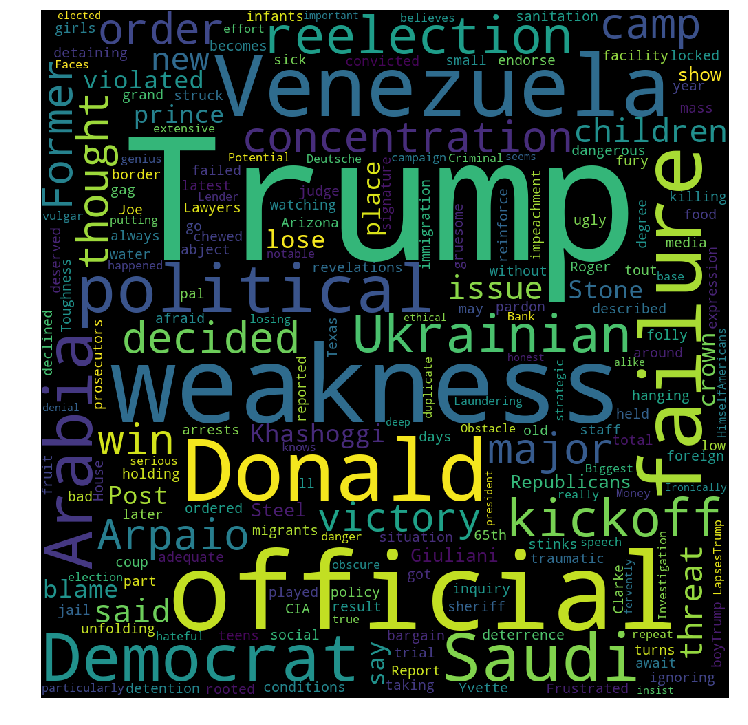

In [34]:
# Let's visualize df_impeach it in a wordcloud.
# After seeing Trump, key words include: Nixon; watergate; House; and Mueller (all negative association words).  

corpus_string = ''
for i in range(20):
    corpus_string = corpus_string + df_impeach.iloc[i]['title']

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

In [35]:
df_trump = pd.read_csv('./trump.csv')

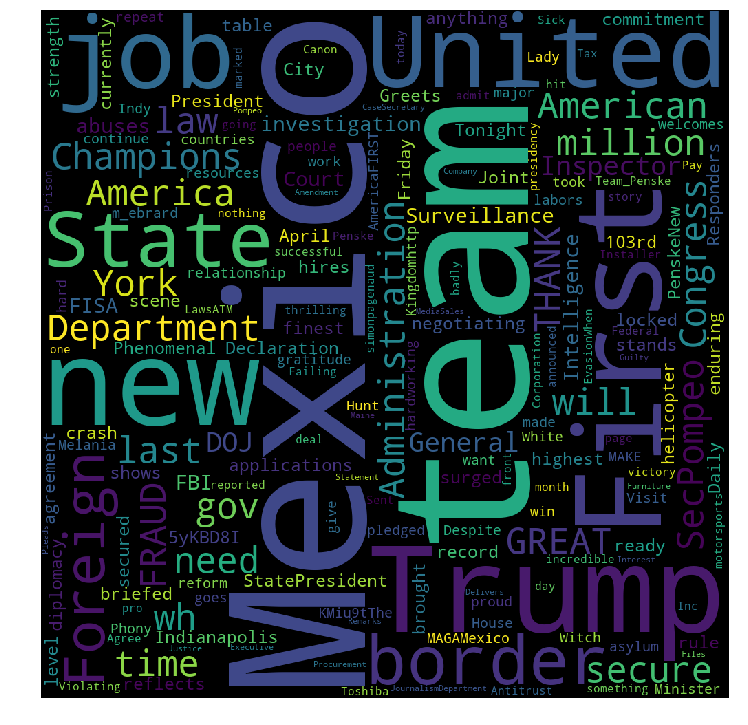

In [36]:
# Let's visualize it in a wordcloud
# Interestingly we see key words including: Mexico; Team; New; and job (all positive words)  

corpus_string = ''
for i in range(20):
    corpus_string = corpus_string + df_trump.iloc[i]['title']

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

## Concat into One DataFrame:

In [37]:
df = pd.concat([df_impeach, df_trump], axis=0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [38]:
df = pd.DataFrame(df, columns = ['subreddit', 'title', 'domain', 'selftext'])

In [39]:
df.head()

,subreddit,title,domain,selftext
0,Impeach_Trump,Former Arizona sheriff Joe Arpaio described hi...,azcentral.com,NaN
1,Impeach_Trump,"Frustrated Donald Trump ""chewed out"" staff for...",newsweek.com,NaN
2,Impeach_Trump,Lawyers: 250 children held in bad conditions a...,apnews.com,NaN
3,Impeach_Trump,Trump’s threat of mass arrests stinks of weakn...,washingtonpost.com,NaN
4,Impeach_Trump,Yvette Clarke becomes the 65th House Democrat ...,thehill.com,NaN


In [40]:
df.tail()

,subreddit,title,domain,selftext
872,trump,President Trump and the First Lady are staying...,twitter.com,NaN
873,trump,Senior Trooper Nicholas Cederberg of the Orego...,twitter.com,NaN
874,trump,The @realDonaldTrump,twitter.com,NaN
875,trump,Remarks by President Trump Before Marine One D...,whitehouse.gov,NaN
876,trump,@realdonaldtrump will make healthcare more aff...,twitter.com,NaN


In [41]:
# Then we encode our target variable which is the sub-Reddit we want to predict in our 
# binary classification model and set up our features(X) and target (y). Trump=1

In [42]:
df['subreddit'] = df['subreddit'].apply(lambda X:1 if X=='trump' else 0)

In [43]:
df.head()

,subreddit,title,domain,selftext
0,0,Former Arizona sheriff Joe Arpaio described hi...,azcentral.com,NaN
1,0,"Frustrated Donald Trump ""chewed out"" staff for...",newsweek.com,NaN
2,0,Lawyers: 250 children held in bad conditions a...,apnews.com,NaN
3,0,Trump’s threat of mass arrests stinks of weakn...,washingtonpost.com,NaN
4,0,Yvette Clarke becomes the 65th House Democrat ...,thehill.com,NaN


In [44]:
df.tail()

,subreddit,title,domain,selftext
872,1,President Trump and the First Lady are staying...,twitter.com,NaN
873,1,Senior Trooper Nicholas Cederberg of the Orego...,twitter.com,NaN
874,1,The @realDonaldTrump,twitter.com,NaN
875,1,Remarks by President Trump Before Marine One D...,whitehouse.gov,NaN
876,1,@realdonaldtrump will make healthcare more aff...,twitter.com,NaN


In [45]:
df['title'].dtype

dtype('O')

In [46]:
X = df['title']
y = df['subreddit']

In [47]:
# count values in 'subreddit' for balance
pd.value_counts(y)

1    877
0    875
Name: subreddit, dtype: int64

In [48]:
# perform train/test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=42, test_size=.2)

# 3) Logistic Regression Classification Model:

### Count Vectorizer to convert text to a matrix of token counts:

In [49]:

cvec = CountVectorizer(stop_words="english")
cvec.fit(X_train)
print(len(cvec.get_feature_names()))
X_train_cv = pd.DataFrame(cvec.transform(X_train).todense(),columns=cvec.get_feature_names())
X_test_cv = pd.DataFrame(cvec.transform(X_test).todense(),columns=cvec.get_feature_names())

5429


In [50]:
print(X_train_cv.head)

<bound method NDFrame.head of       00  000  036  05092019  10  100  102  10downingstreet  \
0      0    0    0         0   0    0    0                0   
1      0    0    0         0   0    0    0                0   
2      0    0    0         0   0    0    0                0   
3      0    0    0         0   0    0    0                0   
4      0    0    0         0   0    0    0                0   
5      0    0    0         0   0    0    0                0   
6      0    0    0         0   0    0    0                0   
7      0    0    0         0   0    0    0                0   
8      0    0    0         0   0    0    0                0   
9      0    0    0         0   0    0    0                0   
10     0    0    0         0   0    0    0                0   
11     0    0    0         0   0    0    0                0   
12     0    0    0         0   0    0    0                0   
13     0    0    0         0   0    0    0                0   
14     0    0    0       

In [51]:
#columns
columns=cvec.get_feature_names()

In [52]:
X_train_cv.shape

(1401, 5429)

In [53]:
X_test_cv.shape

(351, 5429)

### Logistic Regression Algo:

In [54]:
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
y_pred = lr.predict(X_test_cv)
print('accuracy score',accuracy_score(y_test, y_pred))
print('accuracy score',lr.score(X_test_cv, y_test))

accuracy score 0.9230769230769231
accuracy score 0.9230769230769231


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
# Analyzing Keywords via Beta Coefficients
lr_coef = pd.DataFrame(lr.coef_, columns = columns)
df_coef = lr_coef.T.sort_values(by = 0, ascending = False)
df_coef

# key word for Trump:
#   lady; president; melania; foxnews; japan; realdonaldtrump; collusion; negotiated; amazing; potus; great

# key words for Impeach:
#   trump; impeachment; barr; mueller; kushner; ; pelosi; law; war; contempt; warrenflynn; fbi

,0
lady,2.040353
melania,1.554988
president,1.517992
epa,1.303354
remarks,1.266011
usstatevisit,1.093971
thank,1.071563
foxnews,0.978457
amp,0.968314
realdonaldtrump,0.861535


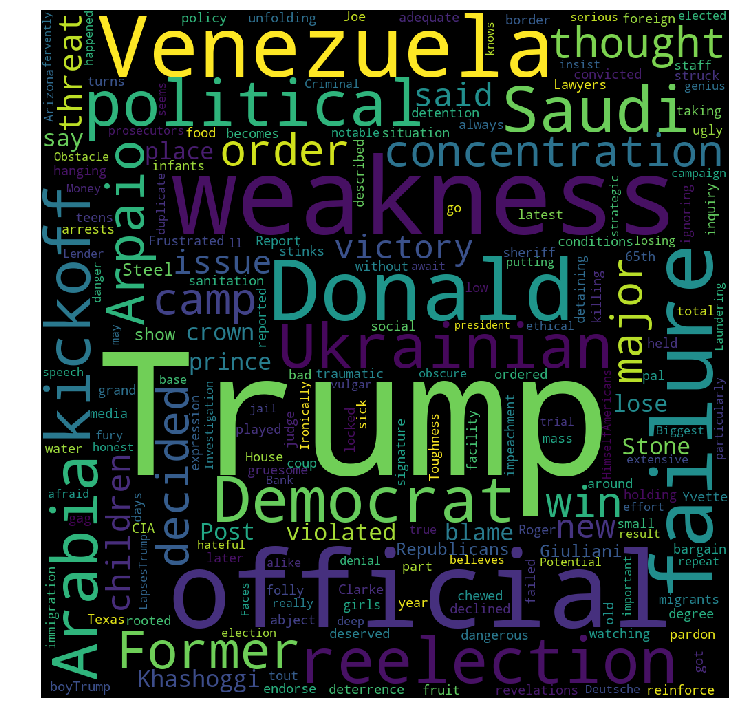

In [56]:
# Let's visualize it in a wordcloud

corpus_string = ''
for i in range(20):
    corpus_string = corpus_string + df.iloc[i]['title']

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

### Confusion Matrix:

In [57]:
# confusion matrix: (do I have this ordered correctly?)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=cm, columns=['predicted Trump', 'predicted Impeach'], 
                     index=['actual Trump', 'actual Impeach'])
cm_df

,predicted Trump,predicted Impeach
actual Trump,159,16
actual Impeach,11,165


In [58]:
y_test.value_counts()

1    176
0    175
Name: subreddit, dtype: int64

### Probabilities for each class using predict_proba:

In [59]:

# the first entry in each row is the estimate of probability of the first class, 
# and the second entry is the estimated probability of the second class
lr.predict_proba(X_test_cv)


array([[7.60447034e-01, 2.39552966e-01],
       [4.58780409e-02, 9.54121959e-01],
       [9.79768148e-01, 2.02318519e-02],
       [1.55982430e-01, 8.44017570e-01],
       [7.77392753e-01, 2.22607247e-01],
       [1.48059181e-01, 8.51940819e-01],
       [3.35428171e-04, 9.99664572e-01],
       [6.45409121e-01, 3.54590879e-01],
       [9.33155210e-01, 6.68447899e-02],
       [9.84181083e-01, 1.58189167e-02],
       [9.91435053e-01, 8.56494671e-03],
       [6.46475101e-01, 3.53524899e-01],
       [2.45308342e-01, 7.54691658e-01],
       [1.02980768e-01, 8.97019232e-01],
       [9.40532541e-01, 5.94674587e-02],
       [1.61821931e-01, 8.38178069e-01],
       [9.97971135e-01, 2.02886548e-03],
       [1.49990311e-02, 9.85000969e-01],
       [3.08896045e-02, 9.69110396e-01],
       [3.08859521e-01, 6.91140479e-01],
       [1.56580991e-03, 9.98434190e-01],
       [9.98818651e-01, 1.18134947e-03],
       [4.25766019e-02, 9.57423398e-01],
       [9.99522164e-01, 4.77836384e-04],
       [2.946069

### Pipeline - TFIDF Vectorizer & Logistic Regression:

In [60]:

model = make_pipeline(TfidfVectorizer(stop_words='english'),
                      LogisticRegression(),
                      )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('accuracy score',accuracy_score(y_test, y_pred))

accuracy score 0.9259259259259259


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Confusion matrix:


In [61]:
# confusion matrix: (do I have this ordered correctly?)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=cm, columns=['predicted Trump', 'predicted Impeach'], 
                     index=['actual Trump', 'actual Impeach'])
cm_df

,predicted Trump,predicted Impeach
actual Trump,164,11
actual Impeach,15,161


In [62]:
y_test.value_counts()

1    176
0    175
Name: subreddit, dtype: int64

# Multinomial Naive Bayes Classification Model:

In [63]:

nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:

y_pred = nb.predict(X_test_cv)

In [65]:
accuracy_score(y_test, y_pred)

0.9202279202279202

### Confusion matrix:


In [66]:
confusion_matrix(y_test, y_pred)

array([[168,   7],
       [ 21, 155]])

In [67]:
# confusion matrix: (do I have this ordered correctly?)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=cm, columns=['predicted Trump', 'predicted Impeach'], 
                     index=['actual Trump', 'actual Impeach'])
cm_df

,predicted Trump,predicted Impeach
actual Trump,168,7
actual Impeach,21,155


In [68]:
y_test.value_counts()

1    176
0    175
Name: subreddit, dtype: int64

### Multinomial Naive Bayes w/ TFIDF:

In [69]:

nb_tfidf = make_pipeline(TfidfVectorizer(stop_words='english'),
                      nb)
nb_tfidf.fit(X_train, y_train)
y_pred = nb_tfidf.predict(X_test)

In [70]:

accuracy_score(y_test, y_pred)

0.9145299145299145

In [71]:

confusion_matrix(y_test, y_pred)

array([[164,  11],
       [ 19, 157]])

In [72]:
# confusion matrix: (do I have this ordered correctly?)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=cm, columns=['predicted Trump', 'predicted Impeach'], 
                     index=['actual Trump', 'actual Impeach'])
cm_df

,predicted Trump,predicted Impeach
actual Trump,164,11
actual Impeach,19,157


# 4) Appendix:


### Pipeline - Count Vectorizer & Logistic Regression:

In [73]:
"""
# same as above but with a Pipeline:
model = make_pipeline(CountVectorizer(stop_words='english'),LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('accuracy score',accuracy_score(y_test, y_pred))
"""

"\n# same as above but with a Pipeline:\nmodel = make_pipeline(CountVectorizer(stop_words='english'),LogisticRegression())\nmodel.fit(X_train, y_train)\ny_pred = model.predict(X_test)\nprint('accuracy score',accuracy_score(y_test, y_pred))\n"

### RandomForest with CountVectorizer - Gridsearch Params + Pipeline

In [74]:
"""
# same as above but with Gridsearch & pipeline:

rf_model = make_pipeline(CountVectorizer(stop_words='english'),
                      RandomForestClassifier(n_estimators= 7, random_state = 42))
#params={'n_estimators' : [5, 7, 10]}
params={}
gs= GridSearchCV(rf_model, param_grid=params)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
#print('best params', gs.best_params_)
print('accuracy score',accuracy_score(y_test, y_pred))
print('best cv score', gs.best_score_)
print('test score', gs.score(X_test, y_test))
"""

"\n# same as above but with Gridsearch & pipeline:\n\nrf_model = make_pipeline(CountVectorizer(stop_words='english'),\n                      RandomForestClassifier(n_estimators= 7, random_state = 42))\n#params={'n_estimators' : [5, 7, 10]}\nparams={}\ngs= GridSearchCV(rf_model, param_grid=params)\ngs.fit(X_train, y_train)\ny_pred = gs.predict(X_test)\n#print('best params', gs.best_params_)\nprint('accuracy score',accuracy_score(y_test, y_pred))\nprint('best cv score', gs.best_score_)\nprint('test score', gs.score(X_test, y_test))\n"

In [75]:
"""
# confusion matrix: (do I have this ordered correctly?)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=cm, columns=['predicted Trump', 'predicted Impeach'], 
                     index=['actual Trump', 'actual Impeach'])
cm_df
"""

"\n# confusion matrix: (do I have this ordered correctly?)\n\ncm = confusion_matrix(y_test, y_pred)\ncm_df = pd.DataFrame(data=cm, columns=['predicted Trump', 'predicted Impeach'], \n                     index=['actual Trump', 'actual Impeach'])\ncm_df\n"

### Pipeline - RandomForest with TFIDFVectorizer & Gridsearch Params:

In [76]:
"""
rf_model_2 = make_pipeline(TfidfVectorizer(stop_words='english'),
                      RandomForestClassifier(n_estimators=7, random_state=42))
#params={'n_estimators' : [5, 7, 10]}
gs1= GridSearchCV(rf_model_2, param_grid=params)
gs1.fit(X_train, y_train)
y_pred = gs1.predict(X_test)
print('accuracy score',accuracy_score(y_test, y_pred))
print('best cv score', gs1.best_score_)
print('test score', gs1.score(X_test, y_test))
"""

"\nrf_model_2 = make_pipeline(TfidfVectorizer(stop_words='english'),\n                      RandomForestClassifier(n_estimators=7, random_state=42))\n#params={'n_estimators' : [5, 7, 10]}\ngs1= GridSearchCV(rf_model_2, param_grid=params)\ngs1.fit(X_train, y_train)\ny_pred = gs1.predict(X_test)\nprint('accuracy score',accuracy_score(y_test, y_pred))\nprint('best cv score', gs1.best_score_)\nprint('test score', gs1.score(X_test, y_test))\n"

In [77]:
"""
# confusion matrix: (do I have this ordered correctly?)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=cm, columns=['predicted Trump', 'predicted Impeach'], 
                     index=['actual Trump', 'actual Impeach'])
cm_df
"""

"\n# confusion matrix: (do I have this ordered correctly?)\n\ncm = confusion_matrix(y_test, y_pred)\ncm_df = pd.DataFrame(data=cm, columns=['predicted Trump', 'predicted Impeach'], \n                     index=['actual Trump', 'actual Impeach'])\ncm_df\n"

## Grid Search

They're both pretty close performance-wise. We could Grid Search over both, but for the sake of time we'll go with `RandomForestClassifier`.

In [78]:
"""
np.sqrt(len(features))
"""

'\nnp.sqrt(len(features))\n'

In [79]:
"""
np.log2(len(features))
"""

'\nnp.log2(len(features))\n'

In [80]:
"""
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_split': [2,3,4]
}
gs = GridSearchCV(rf, param_grid=rf_params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_
"""

"\nrf = RandomForestClassifier()\nrf_params = {\n    'n_estimators': [10, 20, 30],\n    'max_depth': [None, 1, 2, 3, 4, 5],\n    'min_samples_split': [2,3,4]\n}\ngs = GridSearchCV(rf, param_grid=rf_params)\ngs.fit(X_train, y_train)\nprint(gs.best_score_)\ngs.best_params_\n"

In [81]:
"""
gs.score(X_train, y_train)
"""

'\ngs.score(X_train, y_train)\n'

In [82]:
"""
gs.score(X_val, y_val)
"""

'\ngs.score(X_val, y_val)\n'